In [1]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [5]:
num_epocs=4
batch_size=4
learning_rate=0.001

In [34]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_dataset=torchvision.datasets.CIFAR10(root="./data",train=True,download=True,transform=transform)
test_dataset=torchvision.datasets.CIFAR10(root="./data",train=False,download=True,transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [35]:
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size,shuffle=True)

print(len(train_loader),len(test_loader))

classes=("plane","car","bird","cat","deer","dog","frog",'horse',"ship","truck")

12500 2500


In [36]:
train_iter=iter(train_loader)
test_iter=iter(test_loader)

images,labels=train_iter.next()
images.shape

torch.Size([4, 3, 32, 32])

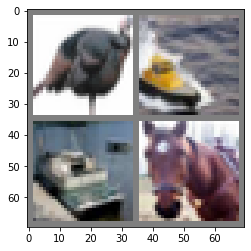

In [37]:
def imshow(img):
    img = img*0.5 +0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show() 
    
imshow(torchvision.utils.make_grid(images,nrow=2))

In [2]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5)
        self.fc1 = nn.Linear(in_features=16*5*5,out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=84)
        self.fc3 = nn.Linear(in_features=84,out_features=10)
    
    def forward(self,x):
        x=self.pool(torch.relu(self.conv1(x)))
        x=self.pool(torch.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=torch.relu(self.fc1(x))
        x=torch.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [6]:
model=NeuralNet().to(device)

criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),learning_rate)

In [40]:
n_total_steps=len(train_loader)

for epoch in range(num_epocs):
    for i ,(images,labels) in enumerate(train_loader):
        images=images.to(device)
        labels=labels.to(device)
        
        outputs=model(images)
        loss=criterion(outputs,labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%2000==0:
            print(f"Epoch {epoch+1}/{num_epocs}, Step {i+1}/{n_total_steps}, Loss {loss.item():.4f}")
            
print("Finished Training")  
        

Epoch 1/4, Step 2000/12500, Loss 1.4707
Epoch 1/4, Step 4000/12500, Loss 2.3496
Epoch 1/4, Step 6000/12500, Loss 1.5175
Epoch 1/4, Step 8000/12500, Loss 1.5845
Epoch 1/4, Step 10000/12500, Loss 1.2013
Epoch 1/4, Step 12000/12500, Loss 0.9514
Epoch 2/4, Step 2000/12500, Loss 0.9447
Epoch 2/4, Step 4000/12500, Loss 0.3855
Epoch 2/4, Step 6000/12500, Loss 2.0619
Epoch 2/4, Step 8000/12500, Loss 0.5676
Epoch 2/4, Step 10000/12500, Loss 1.8584
Epoch 2/4, Step 12000/12500, Loss 2.7208
Epoch 3/4, Step 2000/12500, Loss 2.9014
Epoch 3/4, Step 4000/12500, Loss 0.4249
Epoch 3/4, Step 6000/12500, Loss 1.2815
Epoch 3/4, Step 8000/12500, Loss 1.5007
Epoch 3/4, Step 10000/12500, Loss 2.3193
Epoch 3/4, Step 12000/12500, Loss 1.1588
Epoch 4/4, Step 2000/12500, Loss 0.5657
Epoch 4/4, Step 4000/12500, Loss 1.1392
Epoch 4/4, Step 6000/12500, Loss 1.0178
Epoch 4/4, Step 8000/12500, Loss 1.0201
Epoch 4/4, Step 10000/12500, Loss 0.8977
Epoch 4/4, Step 12000/12500, Loss 2.2161
Finished Training


In [41]:
with torch.no_grad():
    n_correct=0
    n_samples=0
    
    for images,labels in test_loader:
        images=images.to(device)
        labels=labels.to(device)
        outputs=model(images)
        
        _,predictions=torch.max(outputs,1)
        n_samples+=labels.shape[0]
        n_correct+=(predictions==labels).sum().item()
    accuracy = (n_correct/n_samples)*100
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 58.3600
